In [1]:
library(foreign)
library(mgcv)
library(visreg)
library(ggplot2)
df <- read.dta("Datasets/Christian\ Nationalism\ and\ Political\ Violence/Clean Data, Feb 2021 2.dta")

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



In [2]:
#Drop responses with NA
df <- df[!is.na(df$justified),]

#Convert to different response partitions
#(base), not alteration to response
R <- 5
#(i)
#df$justified <- ifelse(df$justified == 1, 1, ifelse(df$justified <= 3, 2, 3))
#R<- 3
#(ii)
#df <- df[df$justified != 1,] #drop responses with value 1 to yield 2,..,5, R=4 categories
#R <- 4

#GAM OLR

ocat_model <- gam(unclass(justified)~ s(victimhood2) + s(whiteidentity2) + s(nationalism2) + supportq2 + pid2 + ideo2 + 
                evangelical + protestant + catholic + otherchristian + otherreligion + attend2 + edu2 + 
                s(age2) + latinx + female + s(age2, nationalism2) + s(victimhood2, nationalism2) + 
                s(victimhood, whiteidentity2) + s(whiteidentity2, nationalism2) + 
                s(victimhood2, supportq2),
                family=ocat(R=R),data=df)

In [3]:
plot_nationalism = visreg(ocat_model, "nationalism2", gg=TRUE, band=FALSE);
plot_whiteidentity2 = visreg(ocat_model, "whiteidentity2", gg=TRUE, band=FALSE);
plot_victimhood2 = visreg(ocat_model, "victimhood2", gg=TRUE, band=FALSE);
plot_support_q = visreg(ocat_model, "supportq2", gg=TRUE, band=FALSE);

ggsave("Visualizations/nationalism.pdf", plot_nationalism);
ggsave("Visualizations/whiteidentity2.pdf", plot_whiteidentity2);
ggsave("Visualizations/victimhood.pdf", plot_victimhood2);
ggsave("Visualizations/support_q.pdf", plot_support_q);

Saving 7 x 7 in image

Saving 7 x 7 in image

Saving 7 x 7 in image

Saving 7 x 7 in image



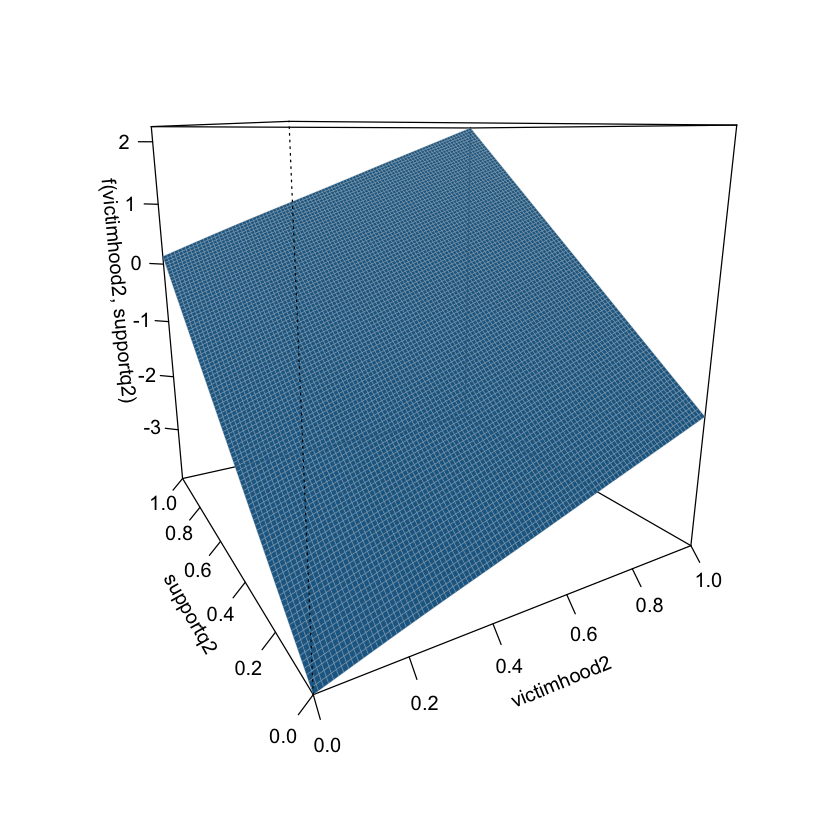

In [88]:
vict_qsupport = visreg2d(ocat_model, "victimhood2", "supportq2", plot.type="persp")

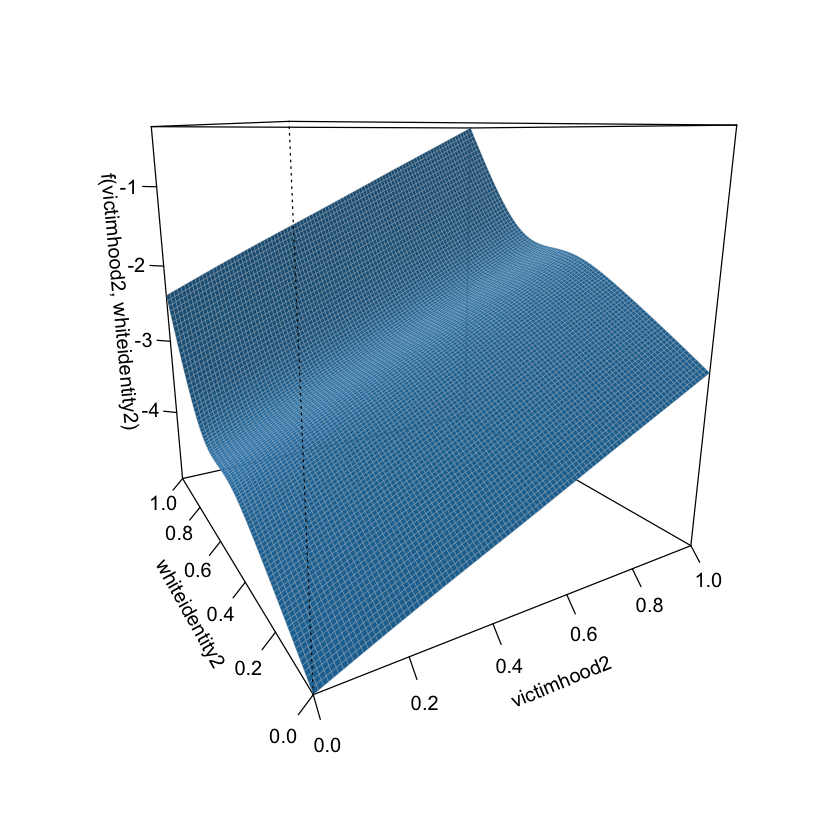

In [89]:
vict_whiteidentity = visreg2d(ocat_model, "victimhood2", "whiteidentity2", plot.type="persp")

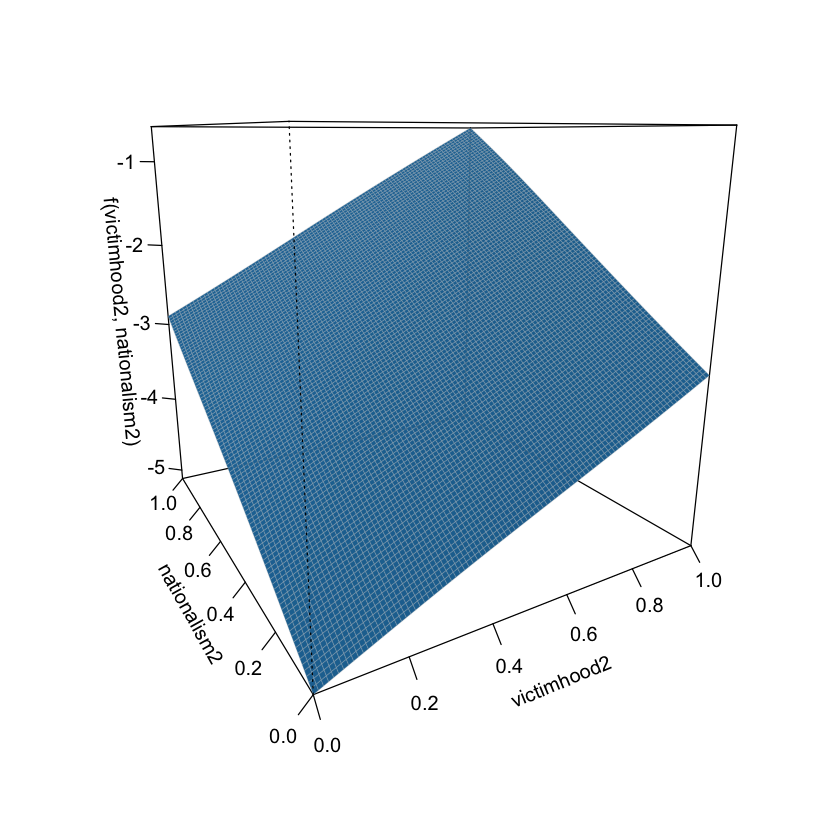

In [90]:
vict_white_identity = visreg2d(ocat_model, "victimhood2", "nationalism2", plot.type="persp")

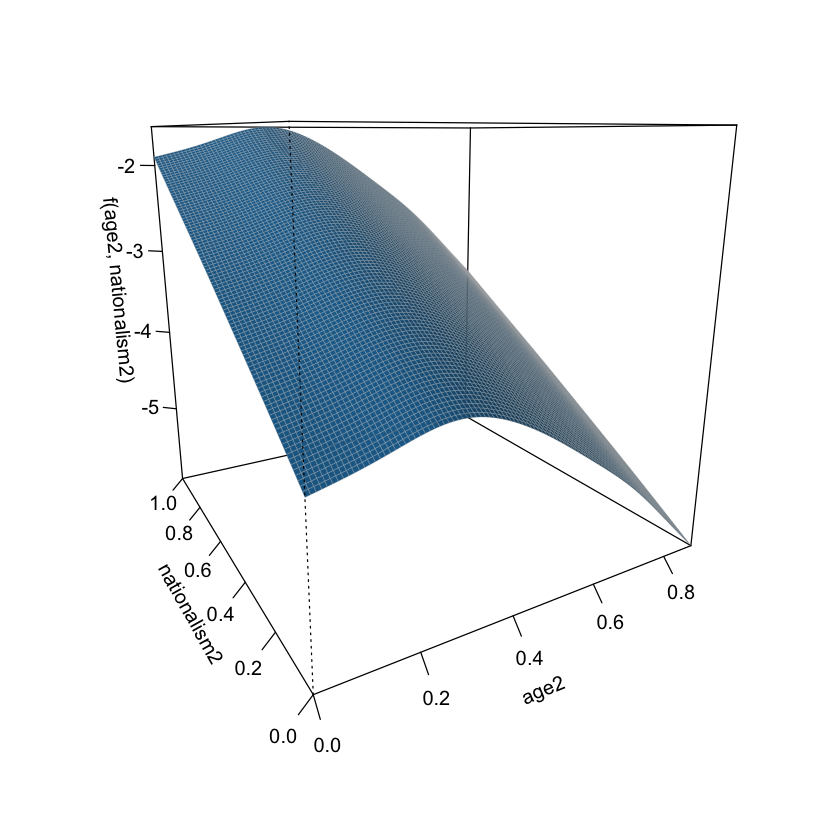

In [91]:
visreg2d(ocat_model, "age2", "nationalism2", plot.type="persp")

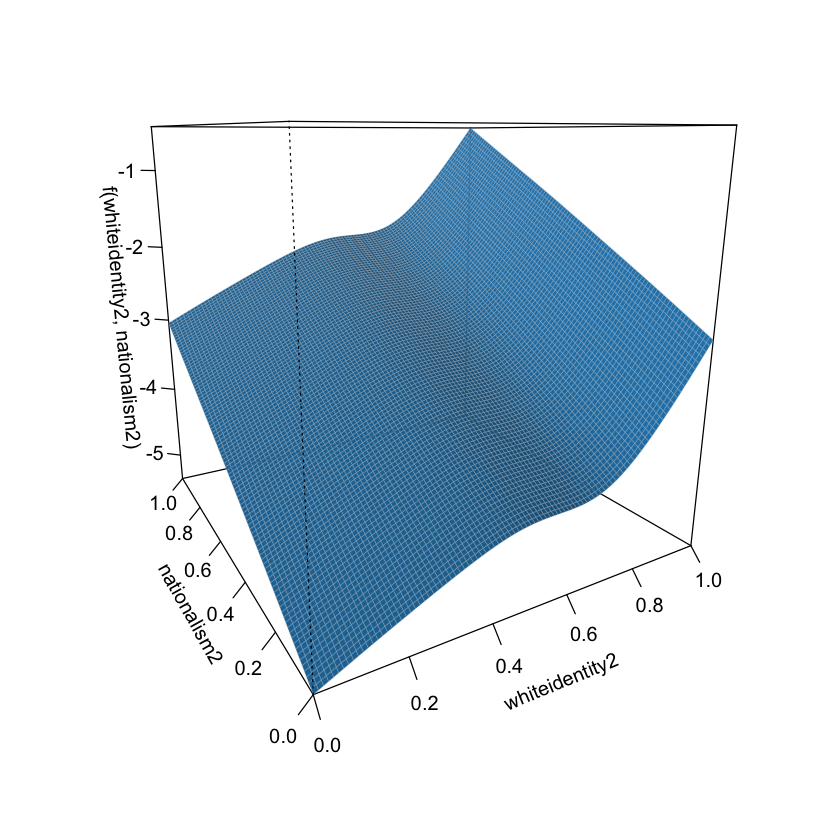

In [92]:
visreg2d(ocat_model, "whiteidentity2", "nationalism2", plot.type="persp")